## Hello. My name is Timur Khaliullin. It's my test taks solution.

In [89]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install xlsxwriter
pd.set_option('display.max_colwidth', None) 

     |████████████████████████████████| 148 kB 9.2 MB/s 


#### Import data and search for necessary information

,ticket_quantity,%
ticket_type,,
Device Failed Availability Check,1588,29.16%
System or agent has recently restarted,860,15.79%
Required service not running,691,12.69%
Host Resource,438,8.04%
Interface state changed to operationally down,275,5.05%
SQL Server Page Life Expectancy is below the threshold,127,2.33%
VM CPU Usage Has Exceeded Threshold,75,1.38%
PowerShell Communication Error,59,1.08%
Disk has exceeded threshold,45,0.83%


Quantity of tickets = 5446
Quantity of unique tickets = 4017


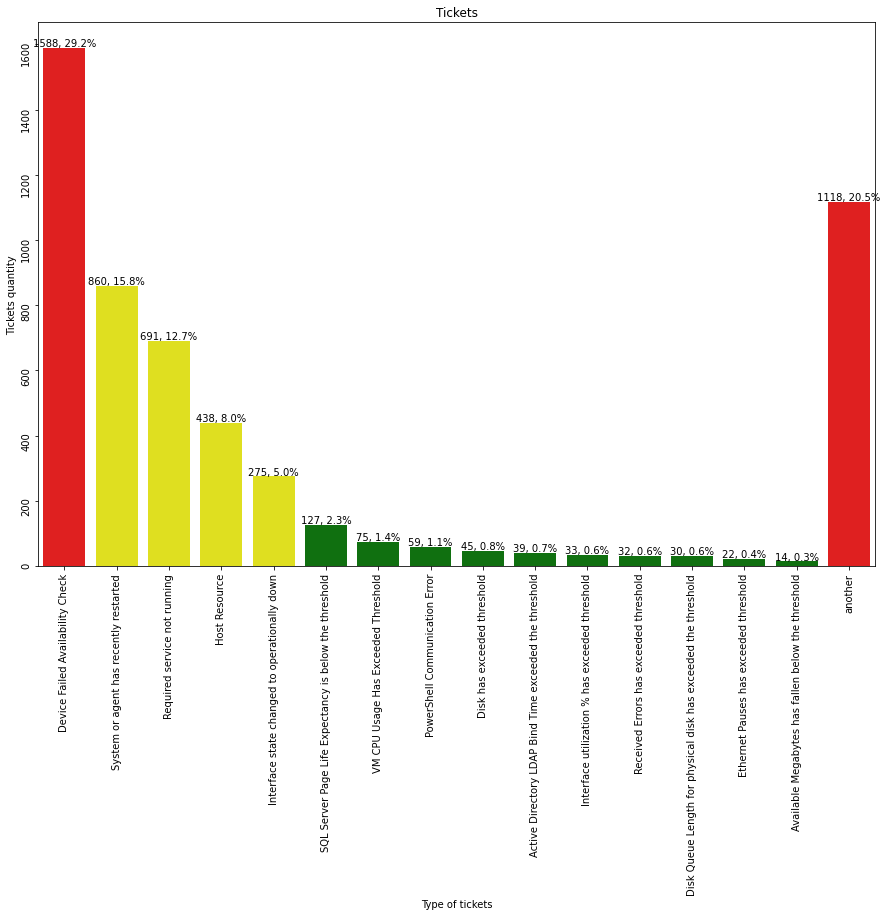

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

,reason_message_quantity,%
reason_type,,
At least one ancestor of...,470,59.57%
Availability App ID:...,300,38.02%
unclear data,19,2.41%


Quantity of tickets with reasons = 789
Quantity of unique tickets with reasons = 449


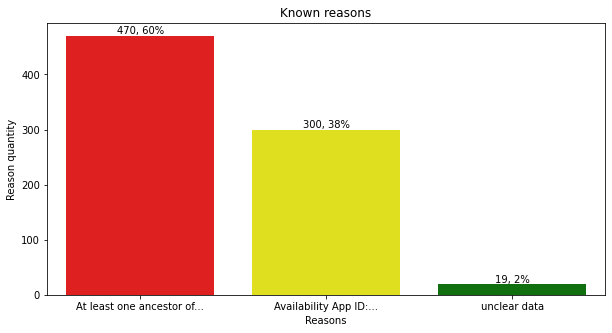

Above on the graph "Tickets" we can see several types of tickets. The most frequent type of tickets is "Device Failed Availability Check" with 1588 tickets or 29.2% of all tickets.
Second most frequent type of tickets is "System or agent has recently restarted" with 860 tickets (15.8%), 3rd - "Required service not running" with 691 (12.7%). 

On the graph "Known reasons" we can see most frequent types of reasons. Reason "At least one ancestor of..." appears 21.5% more often than "Availability App ID:...".
2.4% of all reasons are not defined because of unclear or unsufficient data.


In [91]:
def ticket_file_csv(file_name):
    tickets = pd.read_csv(file_name, sep = ';',header = None, skiprows = 1\
                          , names = ['ticket','reason_1','reason_2','reason_3','reason_4','reason_5'])
    tickets=tickets.dropna(thresh=1)
    tickets=tickets.fillna('')
    tickets['reason'] = tickets['reason_1']+tickets['reason_2']+tickets['reason_3']+tickets['reason_4']+tickets['reason_5']
    tickets = tickets.drop(columns = ['reason_1','reason_2','reason_3','reason_4','reason_5'])

    tickets_all = tickets.copy()
    #display(pd.concat(nu for _, nu in tickets_all.groupby('reason') if len(nu) > 1).head(50))   # Get list of duplicate tickets
    system_restarted = tickets_all[tickets_all['ticket'].str.contains('System or agent', regex= True, na=False)]
    service_not_running = tickets_all[tickets_all['ticket'].str.contains('Required service', regex= True, na=False)]
    ethernet_pauses = tickets_all[tickets_all['ticket'].str.contains('Ethernet Pauses', regex= True, na=False)]
    active_directory = tickets_all[tickets_all['ticket'].str.contains('Active Directory', regex= True, na=False)]
    sql_server = tickets_all[tickets_all['ticket'].str.contains('SQL Server', regex= True, na=False)]
    device_failed = tickets_all[tickets_all['ticket'].str.contains('Device Failed', regex= True, na=False)]
    interface_state_changed = tickets_all[tickets_all['ticket'].str.contains('Interface state changed', regex= True, na=False)]
    disk_queue_length = tickets_all[tickets_all['ticket'].str.contains('Disk Queue Length', regex= True, na=False)]
    powershell_error= tickets_all[tickets_all['ticket'].str.contains('PowerShell Communication Error', regex= True, na=False)]
    host_resource = tickets_all[tickets_all['ticket'].str.contains('Host Resource', regex= True, na=False)]
    vm_cpu_usage = tickets_all[tickets_all['ticket'].str.contains('VM CPU Usage', regex= True, na=False)]
    interface_utilization = tickets_all[tickets_all['ticket'].str.contains('utilization % has exceeded threshold', regex= True, na=False)]
    disk_exceeded_threshold = tickets_all[tickets_all['ticket'].str.contains('has exceeded threshold: \(90', regex= True, na=False)]
    errors_exceeded_threshold = tickets_all[tickets_all['ticket'].str.contains('Received Errors has exceeded threshold', regex= True, na=False)]
    available_megabytes = tickets_all[tickets_all['ticket'].str.contains('Available Megabytes has fallen below', regex= True, na=False)]

    tickets_all.loc[tickets_all.ticket.isin(system_restarted['ticket']), 'ticket_type']= 'System or agent has recently restarted'
    tickets_all.loc[tickets_all.ticket.isin(service_not_running['ticket']), 'ticket_type']= 'Required service not running'
    tickets_all.loc[tickets_all.ticket.isin(ethernet_pauses['ticket']), 'ticket_type']= 'Ethernet Pauses has exceeded threshold'
    tickets_all.loc[tickets_all.ticket.isin(active_directory['ticket']), 'ticket_type']= 'Active Directory LDAP Bind Time exceeded the threshold'
    tickets_all.loc[tickets_all.ticket.isin(sql_server['ticket']), 'ticket_type']= 'SQL Server Page Life Expectancy is below the threshold'
    tickets_all.loc[tickets_all.ticket.isin(device_failed['ticket']), 'ticket_type']= 'Device Failed Availability Check'
    tickets_all.loc[tickets_all.ticket.isin(interface_state_changed['ticket']), 'ticket_type']= 'Interface state changed to operationally down'
    tickets_all.loc[tickets_all.ticket.isin(disk_queue_length['ticket']), 'ticket_type']= 'Disk Queue Length for physical disk has exceeded the threshold'
    tickets_all.loc[tickets_all.ticket.isin(powershell_error['ticket']), 'ticket_type']= 'PowerShell Communication Error'
    tickets_all.loc[tickets_all.ticket.isin(host_resource['ticket']), 'ticket_type']= 'Host Resource'
    tickets_all.loc[tickets_all.ticket.isin(vm_cpu_usage['ticket']), 'ticket_type']= 'VM CPU Usage Has Exceeded Threshold'
    tickets_all.loc[tickets_all.ticket.isin(interface_utilization['ticket']), 'ticket_type']= 'Interface utilization % has exceeded threshold'
    tickets_all.loc[tickets_all.ticket.isin(disk_exceeded_threshold['ticket']), 'ticket_type']= 'Disk has exceeded threshold'
    tickets_all.loc[tickets_all.ticket.isin(errors_exceeded_threshold['ticket']), 'ticket_type']= 'Received Errors has exceeded threshold'
    tickets_all.loc[tickets_all.ticket.isin(available_megabytes['ticket']), 'ticket_type']= 'Available Megabytes has fallen below the threshold'
    tickets_all['ticket_type'] = tickets_all['ticket_type'].fillna('another')
    tickets_all_gb = tickets_all.groupby('ticket_type').agg({'ticket':'count'})
    tickets_all_gb = tickets_all_gb.rename(columns = {'ticket':'ticket_quantity'}).sort_values(by=['ticket_quantity'],ascending=False)
    tickets_all_gb = tickets_all_gb.drop('another').append(tickets_all_gb.loc['another'])
    tickets_all_gb['%'] = tickets_all_gb['ticket_quantity'] / tickets_all_gb['ticket_quantity'].sum()
    display(tickets_all_gb.style.format({'%':'{:.2%}'}))
    print('Quantity of tickets = {}'.format(tickets['ticket'].count()))
    print('Quantity of unique tickets = {}'.format(tickets['ticket'].nunique()))

    plt.figure(figsize = (15, 10))
    colors = ['green' if x < 0.05 else 'yellow' if x >= 0.05 and x < 0.20 else 'red' for x in tickets_all_gb['%'].values]
    ax = sns.barplot(x = tickets_all_gb.index.values, y = tickets_all_gb['ticket_quantity'],  palette = colors)
    for x, y, z in zip(range(len(tickets_all_gb)), tickets_all_gb['ticket_quantity'],tickets_all_gb['%']):                                       
        ax.annotate('{}, {:.1%}'.format(y,z), xy = (x, y + 5), color = 'black',  ha = 'center')
        ax.tick_params(labelrotation=90)
    plt.xlabel('Type of tickets'), plt.ylabel('Tickets quantity'), plt.title('Tickets')
    plt.show();

    #Tickets with known reasons

    tickets_r = tickets.loc[tickets['reason'] != '']

    availability = tickets_r[tickets_r['reason'].str.contains('Av', regex= True, na=False)]
    ancestor = tickets_r[tickets_r['reason'].str.contains('At', regex= True, na=False)]
    tickets_r.loc[tickets_r.reason.isin(availability['reason']), 'reason_type']= 'Availability App ID:...'
    tickets_r.loc[tickets_r.reason.isin(ancestor['reason']), 'reason_type']= 'At least one ancestor of...'
    tickets_r['reason_type'] = tickets_r['reason_type'].fillna('unclear data')
    tickets_r_gb = tickets_r.groupby('reason_type').agg({'reason':'count'})
    tickets_r_gb = tickets_r_gb.rename(columns = {'reason':'reason_message_quantity'})
    tickets_r_gb['%'] = tickets_r_gb['reason_message_quantity'] / tickets_r_gb['reason_message_quantity'].sum()
    display(tickets_r_gb.style.format({'%':'{:.2%}'}))
    print('Quantity of tickets with reasons = {}'.format(tickets_r['reason'].count()))
    print('Quantity of unique tickets with reasons = {}'.format(tickets_r['reason'].nunique()))
    #display(pd.concat(nu for _, nu in tickets_r.groupby('reason') if len(nu) > 1).head(50))   # Get list of duplicate reason
    plt.figure(figsize = (10, 5))
    colors = ['green' if x < 0.10 else 'yellow' if x >= 0.10 and x < 0.50 else 'red' for x in tickets_r_gb['%'].values]
    ax = sns.barplot(x = tickets_r_gb.index.values, y = tickets_r_gb['reason_message_quantity'],  palette = colors)
    for x, y, z in zip(range(len(tickets_r_gb)), tickets_r_gb['reason_message_quantity'],tickets_r_gb['%']):                                       
        ax.annotate('{}, {:.0%}'.format(y,z), xy = (x, y + 3), color = 'black',  ha = 'center')
    plt.xlabel('Reasons'), plt.ylabel('Reason quantity'), plt.title('Known reasons')
    plt.show();

    print('Above on the graph "Tickets" we can see several types of tickets. The most frequent type of tickets is "{}" with {:.0f} tickets or {:.1%} of all tickets.\n\
Second most frequent type of tickets is "{}" with {:.0f} tickets ({:.1%}), 3rd - "{}" with {:.0f} ({:.1%}). \n\nOn the graph "Known reasons" we can see most frequent types of reasons. \
Reason "{}" appears {:.1%} more often than "{}".\n{:.1%} of all reasons are not defined because of unclear or unsufficient data.'.format(\
      tickets_all_gb.index[0],tickets_all_gb.iloc[0,0],tickets_all_gb.iloc[0,1],\
      tickets_all_gb.index[1],tickets_all_gb.iloc[1,0],tickets_all_gb.iloc[1,1],\
      tickets_all_gb.index[2],tickets_all_gb.iloc[2,0],tickets_all_gb.iloc[2,1],\
      tickets_r_gb.index[0],tickets_r_gb.iloc[0,1] - tickets_r_gb.iloc[1,1],tickets_r_gb.index[1],tickets_r_gb.iloc[2,1]))
    
    excel_file = pd.ExcelWriter('Tickets.xlsx', engine='xlsxwriter')
    tickets_all_gb.to_excel(excel_file, sheet_name = 'Tickets')
    tickets_r_gb.to_excel(excel_file, sheet_name = 'Reasons')
    excel_file.save()

ticket_file_csv('tickets.csv')

On the graph "Tickets" you should focus your attention on these Top 3 types of tickets, especially on "Device Failed Availability Check", it seems too much tickets of this type relative to others. 
(This graph could have been more accurate if I had the entire list of tickets types on me.)

On the graph "Known reasons" you should focus your attention on "At least one ancestor of ... has been marked as unavailable" reason.

I could give more accurate conclusions is I had more information about product and database. Also for more readable and lovely graph should be used Tableau (my choice) or PBI.

Thank you